Importing and Installing the Necessary Visualization Libraries

In [1]:
!pip install calmap --upgrade --quiet 

In [2]:
!pip install plotly-calplot --upgrade --quiet 

In [3]:
import pandas as pd
import numpy as np
from collections import OrderedDict
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [4]:
import calmap
from plotly_calplot import calplot
pd.set_option('display.max_columns', 500)
plt.style.use('seaborn-dark-palette')

In [5]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import missingno as msno
%matplotlib inline

Uploading the Dataset

In [7]:
from google.colab import files
uploaded = files.upload()

Saving On_Time_Prediction_Dataset.csv to On_Time_Prediction_Dataset.csv


Reading the CSV File

In [8]:
Flights_df = pd.read_csv('On_Time_Prediction_Dataset.csv') 

In [9]:
Flights_df

,Month,Date,Day of Week,Airline_ID,flight,Origin,Distance,depart,Flight_Duration,Delay
0,10,10,1,OO,5836,ORD,157,8.18,51,27.0
1,1,4,1,OO,5866,ORD,466,15.50,102,NaN
2,11,22,1,OO,6016,ORD,738,7.17,127,-19.0
3,2,14,5,B6,199,JFK,2248,21.17,365,60.0
4,5,25,3,WN,1675,SJC,386,12.92,85,22.0
...,...,...,...,...,...,...,...,...,...,...
274995,4,31,6,UA,259,ORD,888,16.75,154,46.0
274996,3,14,1,UA,119,SFO,337,16.20,84,33.0
274997,10,4,2,AA,716,ORD,1005,7.00,155,-6.0
274998,9,27,1,B6,128,JFK,267,22.50,86,-19.0


Analysing The Null Value Composition

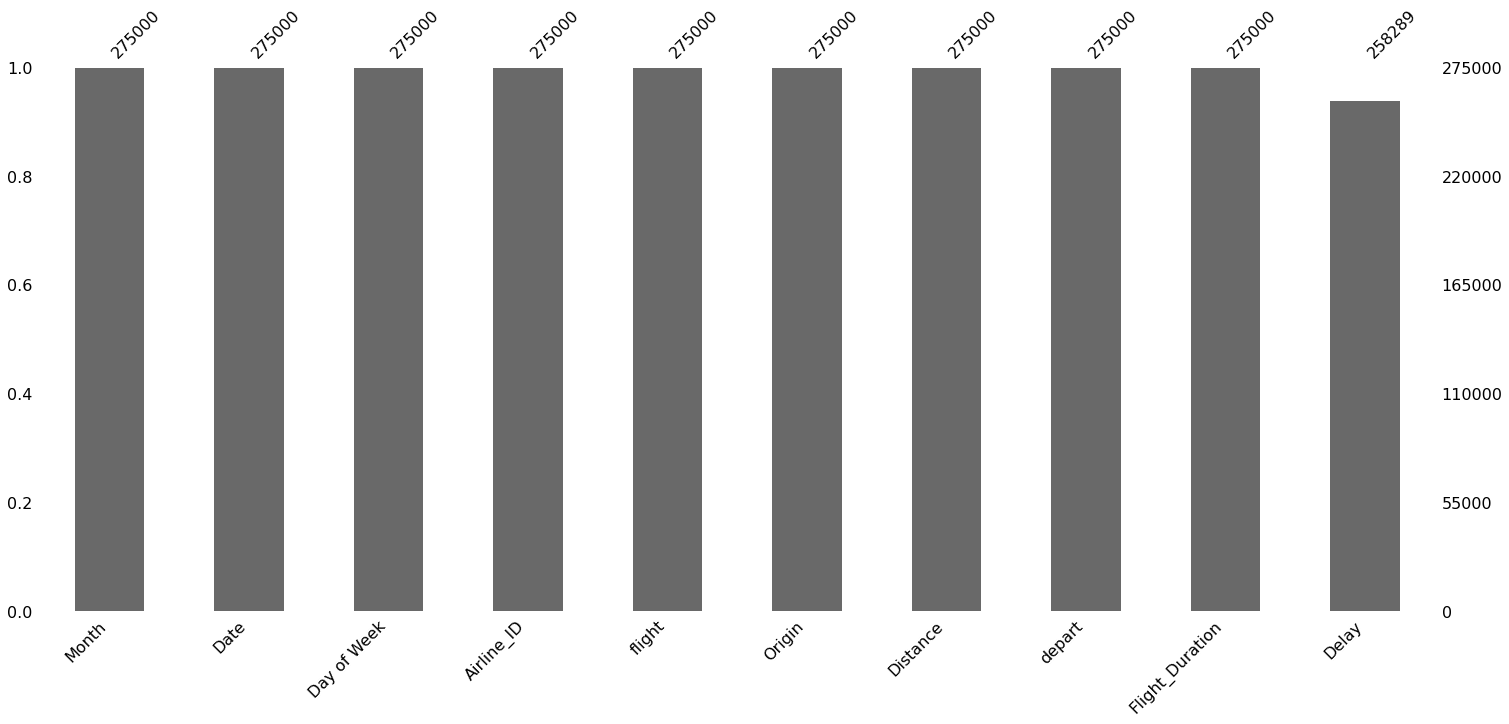

In [10]:
msno.bar(Flights_df)

Removing the records with Null values

In [11]:
Flights_df_new = Flights_df.dropna()

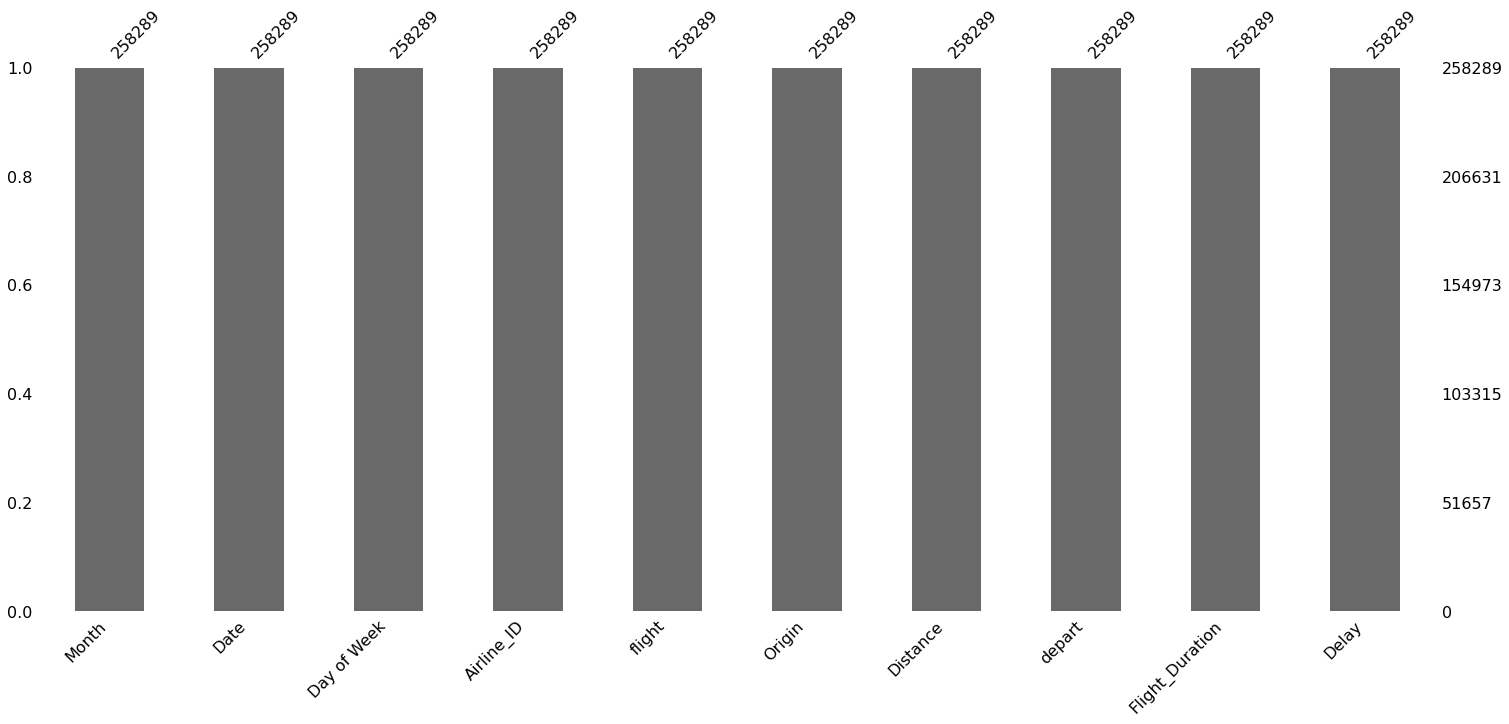

In [12]:
msno.bar(Flights_df_new)

Determing the count of each Airline

In [14]:
Flights_df_new['Airline_ID'].value_counts()

UA    68328
AA    57347
OO    41839
WN    28906
B6    27333
OH    16094
US    14210
HA     3746
AQ      486
Name: Airline_ID, dtype: int64

Determing if there is a Delay or not.

In [15]:
Flights_df_new.loc[Flights_df_new['Delay'] <  10, 'Delay Occur'] = 'No' 
Flights_df_new.loc[Flights_df_new['Delay'] >  10, 'Delay Occur'] = 'Yes'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [16]:
Flights_df_new

,Month,Date,Day of Week,Airline_ID,flight,Origin,Distance,depart,Flight_Duration,Delay,Delay Occur
0,10,10,1,OO,5836,ORD,157,8.18,51,27.0,Yes
2,11,22,1,OO,6016,ORD,738,7.17,127,-19.0,No
3,2,14,5,B6,199,JFK,2248,21.17,365,60.0,Yes
4,5,25,3,WN,1675,SJC,386,12.92,85,22.0,Yes
5,3,28,1,B6,377,LGA,1076,13.33,182,70.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
274995,4,31,6,UA,259,ORD,888,16.75,154,46.0,Yes
274996,3,14,1,UA,119,SFO,337,16.20,84,33.0,Yes
274997,10,4,2,AA,716,ORD,1005,7.00,155,-6.0,No
274998,9,27,1,B6,128,JFK,267,22.50,86,-19.0,No


Calculating the count of Delay

In [17]:
Flights_df_new['Delay Occur'].value_counts()

Yes    129062
No     127701
Name: Delay Occur, dtype: int64

In [18]:
Flights_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258289 entries, 0 to 274999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Month            258289 non-null  int64  
 1   Date             258289 non-null  int64  
 2   Day of Week      258289 non-null  int64  
 3   Airline_ID       258289 non-null  object 
 4   flight           258289 non-null  int64  
 5   Origin           258289 non-null  object 
 6   Distance         258289 non-null  int64  
 7   depart           258289 non-null  float64
 8   Flight_Duration  258289 non-null  int64  
 9   Delay            258289 non-null  float64
 10  Delay Occur      256763 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 23.6+ MB


In [19]:
Flights_df_new.describe()

,Month,Date,Day of Week,flight,Distance,depart,Flight_Duration,Delay
count,258289.000000,258289.000000,258289.000000,258289.000000,258289.000000,258289.000000,258289.000000,258289.000000
mean,5.287941,15.725110,2.951004,2040.610080,890.297446,14.088847,152.542551,28.347731
std,3.409737,8.795424,1.967279,2174.285856,705.482985,4.689136,87.622409,54.014895
min,0.000000,1.000000,0.000000,1.000000,11.000000,0.250000,30.000000,-80.000000
25%,2.000000,8.000000,1.000000,412.000000,358.000000,10.000000,85.000000,-6.000000
50%,5.000000,16.000000,3.000000,1069.000000,678.000000,14.000000,125.000000,15.000000
75%,8.000000,23.000000,5.000000,2645.000000,1182.000000,18.050000,195.000000,43.000000
max,11.000000,31.000000,6.000000,6941.000000,4243.000000,23.980000,560.000000,1370.000000


Plotting the Delay Occurences to see the distribution of Delay Count

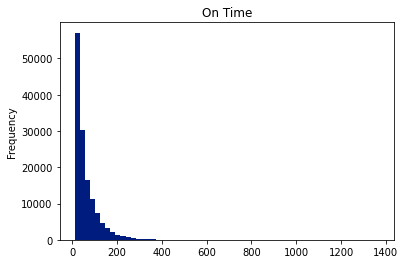

In [21]:
Flights_df_new.query('Delay > 10')['Delay'].plot(kind='hist', bins=60,title='On Time')

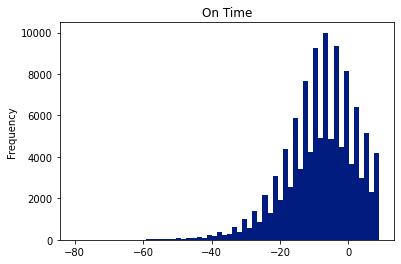

In [22]:
Flights_df_new.query('Delay < 10')['Delay'].plot(kind='hist', bins=60,title='On Time')

In [23]:
Flights_df_new_1=Flights_df_new
Flights_df_new_1

,Month,Date,Day of Week,Airline_ID,flight,Origin,Distance,depart,Flight_Duration,Delay,Delay Occur
0,10,10,1,OO,5836,ORD,157,8.18,51,27.0,Yes
2,11,22,1,OO,6016,ORD,738,7.17,127,-19.0,No
3,2,14,5,B6,199,JFK,2248,21.17,365,60.0,Yes
4,5,25,3,WN,1675,SJC,386,12.92,85,22.0,Yes
5,3,28,1,B6,377,LGA,1076,13.33,182,70.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
274995,4,31,6,UA,259,ORD,888,16.75,154,46.0,Yes
274996,3,14,1,UA,119,SFO,337,16.20,84,33.0,Yes
274997,10,4,2,AA,716,ORD,1005,7.00,155,-6.0,No
274998,9,27,1,B6,128,JFK,267,22.50,86,-19.0,No


In [43]:
Flights_df_new_1.columns = ['Month','Date','Day of Week','Airline_ID','flight','Origin','Distance','depart','Flight_Duration','Delay','Delay Occur']

In [44]:
corr = Flights_df_new_1.corr()

In [45]:
import plotly.figure_factory as ff

Plotting a correlation matrix for the parameters

In [46]:
l = list(corr.columns)

fig = ff.create_annotated_heatmap(np.array(round(corr,10)), x=l, y=l, colorscale = 'blues', reversescale=True)
fig.update_layout(title='Correlation ')

fig.show()

Examining the variation i.e. the influence of other parameters on the Delay

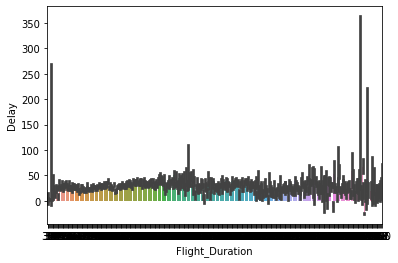

In [47]:
sns.barplot(x = Flights_df_new_1["Flight_Duration"], y = Flights_df_new_1["Delay"])

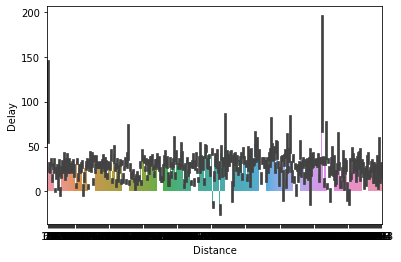

In [48]:
sns.barplot(x = Flights_df_new_1["Distance"], y = Flights_df_new_1["Delay"])

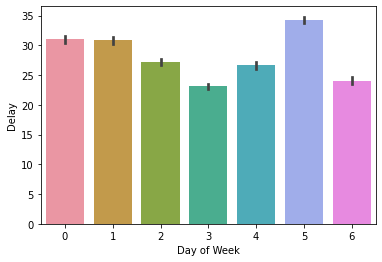

In [51]:
sns.barplot(x = Flights_df_new_1["Day of Week"], y = Flights_df_new_1["Delay"])

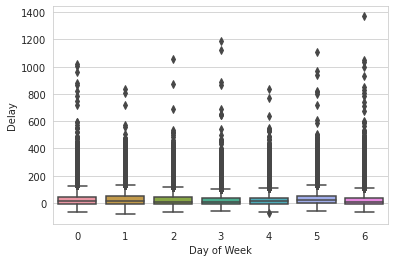

In [52]:
sns.set_style("whitegrid")
sns.boxplot(x = 'Day of Week', y = 'Delay', data = Flights_df_new_1)

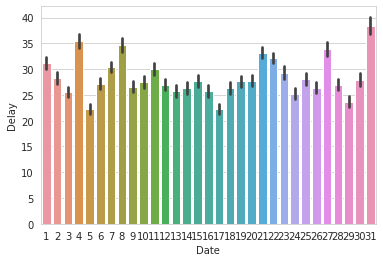

In [53]:
sns.barplot(x = Flights_df_new_1["Date"], y = Flights_df_new_1["Delay"])

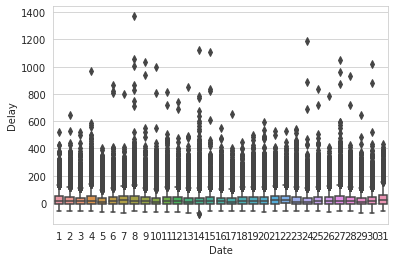

In [54]:
sns.set_style("whitegrid")
sns.boxplot(x = 'Date', y = 'Delay', data = Flights_df_new_1)

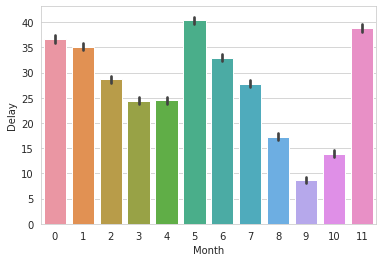

In [55]:
sns.barplot(x = Flights_df_new_1["Month"], y = Flights_df_new_1["Delay"])

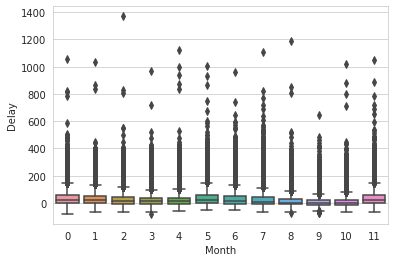

In [56]:
sns.set_style("whitegrid")
sns.boxplot(x = 'Month', y = 'Delay', data = Flights_df_new_1)

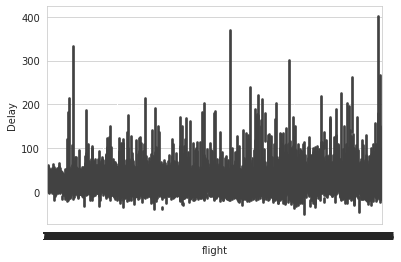

In [57]:
sns.barplot(x = Flights_df_new_1["flight"], y = Flights_df_new_1["Delay"])

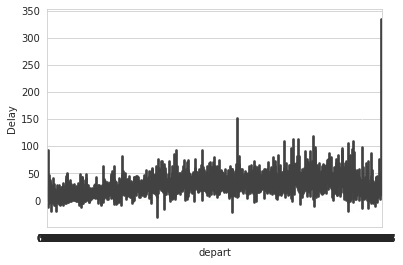

In [58]:
sns.barplot(x = Flights_df_new_1["depart"], y = Flights_df_new_1["Delay"])

-End of Code-